In [1]:
import numpy as py
#定义sigmoid函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
def initialize(dims):
    w=np.zeros((dims,1))
    b=0
    return w,b

In [14]:
def logistic(X,y,W,b):
    num_train=X.shape[0]
    num_feature=X.shape[1]
    
    y_hat=sigmoid(np.dot(X,W)+b)
    cost=-1/num_train*np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
    
    dW=np.dot(X.T,y_hat-y)/num_train
    db=np.sum(y_hat-y)/num_train
    cost=np.squeeze(cost)
    
    return y_hat,cost,dW,db

In [23]:
def logistic_train(X,y,learning_rate,epochs):
    W,b=initialize(X.shape[1])
    cost_list=[]
    
    for i in range(epochs):
        y_hat,cost,dW,db=logistic(X,y,W,b)
        W-=dW*learning_rate
        b-=db*learning_rate
        
        if i%100==0:
            cost_list.append(cost)
            print("epoch %d :cost %f"%(i,cost))
        
    para={'W':W,'b':b}
    grads={'dW':dW,'db':db}
    
    return cost_list,para,grads

In [27]:
def predict(X,para):
    y_prediction=sigmoid(np.dot(X,para['W'])+para['b'])
    for i in range(len(y_prediction)):
        if y_prediction[i]>0.5:
            y_prediction[i]=1
        else:
            y_prediction[i]=0
    return y_prediction

In [17]:
#使用sklearn生成模拟的二分类数据集进行模型训练和测试
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_classification
X,labels=make_classification(n_samples=100,n_features=2,n_redundant=0,n_informative=2,random_state=1,n_clusters_per_class=2)

In [18]:
offset=int(X.shape[0]*0.9)
X_train,y_train=X[:offset],labels[:offset]
X_test,y_test=X[offset:],labels[:offset]
y_train=y_train.reshape((-1,1))
y_test=y_test.reshape((-1,1))

print('X_train=',X_train.shape)
print('X_test=',X_test.shape)
print('y_train=',y_train.shape)
print('y_test=',y_test.shape)

X_train= (90, 2)
X_test= (10, 2)
y_train= (90, 1)
y_test= (90, 1)


In [25]:
cost_list,para,grads=logistic_train(X_train,y_train,0.02,1000)

epoch 0 :cost 0.693147
epoch 100 :cost 0.416158
epoch 200 :cost 0.300512
epoch 300 :cost 0.240201
epoch 400 :cost 0.203590
epoch 500 :cost 0.179055
epoch 600 :cost 0.161463
epoch 700 :cost 0.148217
epoch 800 :cost 0.137871
epoch 900 :cost 0.129556


In [28]:
#对测试集进行验证
y_prediction=predict(X_test,para)
print(y_prediction)

[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]]


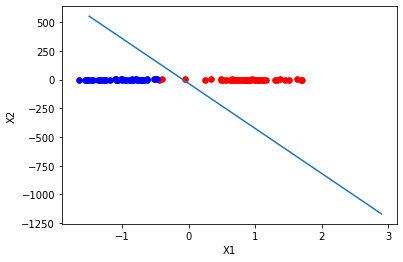

In [30]:
#将结果可视化
def plot_logistic(X_train,y_train,para):
    n=X_train.shape[0]
    xcord1=[]
    xcord0=[]
    ycord1=[]
    ycord0=[]
    for i in range(n):
        if y_train[i]==1:
            xcord1.append(X_train[i][0])
            ycord1.append(X_train[i][1])
        else:
            xcord0.append(X_train[i][0])
            ycord0.append(X_train[i][1])
            
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s=32,c='red')
    ax.scatter(xcord0,ycord0,s=32,c='blue')
    x=np.arange(-1.5,3,0.1)
    y=(-para['b']-para['W'][0]*x)/para['W'][1]
    ax.plot(x,y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    
plot_logistic(X_train,y_train,para)

(90, 2) (90, 1) (10, 2) (10, 1)
epoch 0 cost 0.693147
epoch 100 cost 0.521480
epoch 200 cost 0.416359
epoch 300 cost 0.347951
epoch 400 cost 0.300680
epoch 500 cost 0.266327
epoch 600 cost 0.240328
epoch 700 cost 0.220002
epoch 800 cost 0.203687
epoch 900 cost 0.190306
{'W': array([[ 2.04608084],
       [-0.03964634]]), 'b': 0.12335926234285087}
train accuracy is: 0.9666666666666667
test accuracy is: 1.0


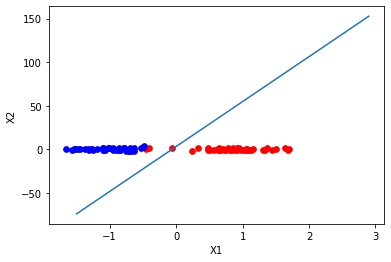

In [34]:
#封装成类
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_classification

class logistic_regression():    
    def __init__(self):        
        pass

    def sigmoid(self, x):
        z = 1 / (1 + np.exp(-x))        
        return z    
        
    def initialize_params(self, dims):
        W = np.zeros((dims, 1))
        b = 0
        return W, b    
    
    def logistic(self, X, y, W, b):
        num_train = X.shape[0]
        num_feature = X.shape[1]

        y_hat = self.sigmoid(np.dot(X, W) + b)
        cost = -1 / num_train * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

        dW = np.dot(X.T, (y_hat - y)) / num_train
        db = np.sum(y_hat - y) / num_train
        cost = np.squeeze(cost)        
        return y_hat, cost, dW, db    
        
    def logistic_train(self, X, y, learning_rate, epochs):
        W, b = self.initialize_params(X.shape[1])
        cost_list = []        
        for i in range(epochs):
            y_hat, cost, dW, db = self.logistic(X, y, W, b)
            W = W - learning_rate * dW
            b = b - learning_rate * db            
            if i % 100 == 0:
                cost_list.append(cost)            
            if i % 100 == 0:
                print('epoch %d cost %f' % (i, cost))

        params = {
            'W': W, 
            'b': b
        }
        grads = {            
            'dW': dW,            
            'db': db
        }        
        
        return cost_list, params, grads    
        
    def predict(self, X, params):
        y_prediction = self.sigmoid(np.dot(X, params['W']) + params['b'])        
        for i in range(len(y_prediction)):            
            if y_prediction[i] > 0.5:
                y_prediction[i] = 1
            else:
                y_prediction[i] = 0

        return y_prediction    
            
    def accuracy(self, y_test, y_pred):
        correct_count = 0
        for i in range(len(y_test)):            
            for j in range(len(y_pred)):                
                if y_test[i] == y_pred[j] and i == j:
                    correct_count += 1

        accuracy_score = correct_count / len(y_test)        
        return accuracy_score    
        
    def create_data(self):
        X, labels = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2)
        labels = labels.reshape((-1, 1))
        offset = int(X.shape[0] * 0.9)
        X_train, y_train = X[:offset], labels[:offset]
        X_test, y_test = X[offset:], labels[offset:]        
        return X_train, y_train, X_test, y_test    
        
    def plot_logistic(self, X_train, y_train, params):
        n = X_train.shape[0]
        xcord1 = []
        ycord1 = []
        xcord2 = []
        ycord2 = []        
        for i in range(n):            
            if y_train[i] == 1:
                xcord1.append(X_train[i][0])
                ycord1.append(X_train[i][1])            
            else:
                xcord2.append(X_train[i][0])
                ycord2.append(X_train[i][1])
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.scatter(xcord1, ycord1, s=32, c='red')
        ax.scatter(xcord2, ycord2, s=32, c='blue')
        x = np.arange(-1.5, 3, 0.1)
        y = (-params['b'] - params['W'][0] * x) / params['W'][1]
        ax.plot(x, y)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.show()

            
if __name__ == "__main__":
    model = logistic_regression()
    X_train, y_train, X_test, y_test = model.create_data()
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    cost_list, params, grads = model.logistic_train(X_train, y_train, 0.01, 1000)
    print(params)
    y_train_pred = model.predict(X_train, params)
    accuracy_score_train = model.accuracy(y_train, y_train_pred)
    print('train accuracy is:', accuracy_score_train)
    y_test_pred = model.predict(X_test, params)
    accuracy_score_test = model.accuracy(y_test, y_test_pred)
    print('test accuracy is:', accuracy_score_test)
    model.plot_logistic(X_train, y_train, params)
